In [1]:
import numpy as np
import pandas as pd
import ast
from collections import Counter

train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
submission = pd.read_csv('input/sample_submission.csv')

## Exploratory Data Analysis

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Correlation Matrix for Train Data')

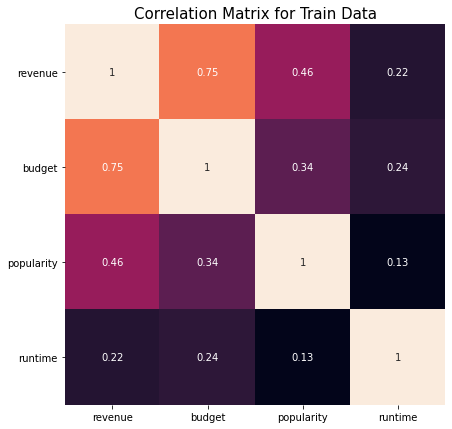

In [3]:
plt.figure(figsize=(12, 7))

col = ['revenue','budget','popularity','runtime']
corr_matrix = train[col].corr()

sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), square=True, annot=True, cbar=False)

plt.yticks(rotation=0) 
plt.xticks(rotation=0)
plt.title('Correlation Matrix for Train Data', fontsize = 15)


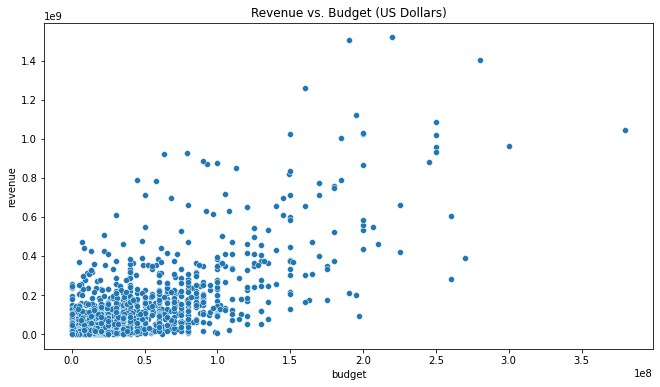

In [4]:
# Scatterplot: Budget vs. Revenue
plt.figure(figsize=(24,6))
plt.subplot(121); 
sns.scatterplot(x="budget", y="revenue", data=train); 
plt.title('Revenue vs. Budget (US Dollars)');

/Users/jordanj/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


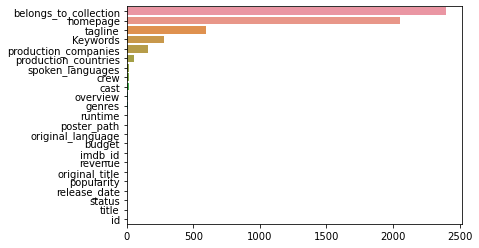

In [5]:
# Plot number of Nan/Null values per column

null_vals = train.isna().sum().sort_values(ascending=False)
sns.barplot(null_vals,null_vals.index)
plt.show()



/Users/jordanj/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


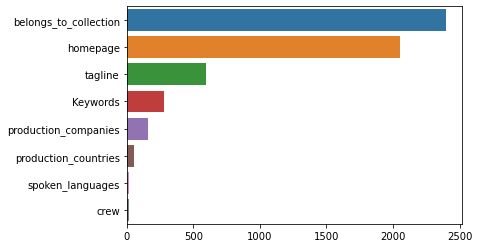

In [6]:
# Null vales per feature
null_vals = train.isna().sum().sort_values(ascending=False)
sns.barplot(null_vals[:8],null_vals[:8].index)
plt.show()

Text(0.5, 1.0, 'Log(Revenue) Distribution')

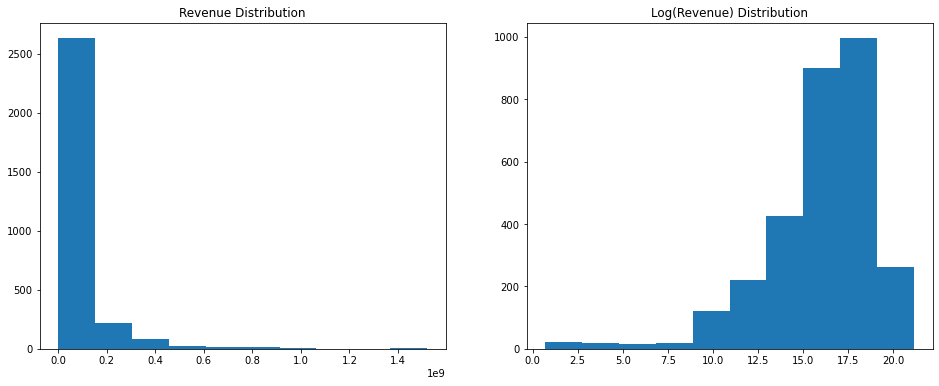

In [7]:
# code to plot distributions from: https://www.kaggle.com/artgor/eda-feature-engineering-and-model-interpretation

fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(train['revenue'])
plt.title('Revenue Distribution')

# plot a log transform revenue data
plt.subplot(1, 2, 2)
plt.hist(np.log1p(train['revenue']))
plt.title('Log(Revenue) Distribution')

Text(0.5, 1.0, 'Log(budget) Distribution')

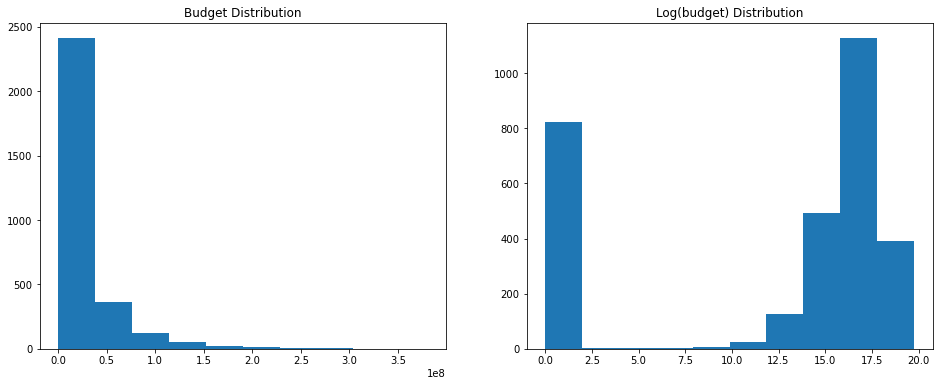

In [8]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(train['budget'])
plt.title('Budget Distribution')

# plot a log transform revenue data
plt.subplot(1, 2, 2)
plt.hist(np.log1p(train['budget']))
plt.title('Log(budget) Distribution')

Text(0.5, 1.0, 'Log(Popularity Score) Distribution')

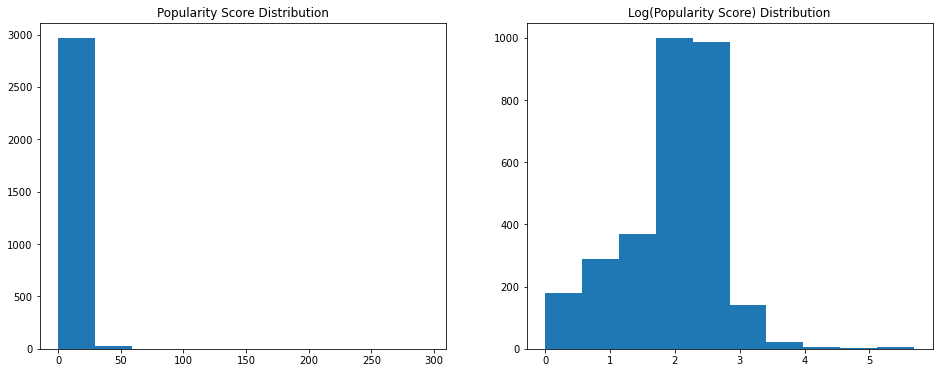

In [9]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(train['popularity'])
plt.title('Popularity Score Distribution')

# plot a log transform revenue data
plt.subplot(1, 2, 2)
plt.hist(np.log1p(train['popularity']))
plt.title('Log(Popularity Score) Distribution')

## Data Cleaning and Preprocessing

### further data exploration

In [10]:
train.head(3).T

,0,1,2
id,1,2,3
belongs_to_collection,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...","[{'id': 107674, 'name': 'The Princess Diaries ...",NaN
budget,14000000,40000000,3300000
genres,"[{'id': 35, 'name': 'Comedy'}]","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 18, 'name': 'Drama'}]"
homepage,NaN,NaN,http://sonyclassics.com/whiplash/
imdb_id,tt2637294,tt0368933,tt2582802
original_language,en,en,en
original_title,Hot Tub Time Machine 2,The Princess Diaries 2: Royal Engagement,Whiplash
overview,"When Lou, who has become the ""father of the In...",Mia Thermopolis is now a college graduate and ...,"Under the direction of a ruthless instructor, ..."
popularity,6.57539,8.24889,64.3


In [11]:
# What does the training data look like?
train.shape

(3000, 23)

In [12]:
# What does test data look like?
test.shape

(4398, 22)

In [13]:
# Datatype of each column
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [14]:
# How many columns contain nulls?
train.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

### Preprocessing

In [15]:
# Remove rows with zero budget
train = train.loc[train['budget'] != 0]
train.shape


(2188, 23)

In [16]:
# Remove rows with zero popularity
# popularity is a float, so equality to zero is problematic, assume less than .01 is zero

train = train.loc[train['popularity'] > 0.01]
train.shape

(2186, 23)

In [17]:
def remove_ignored_columns(df):
    ignored = ['id', 'title', 'original_title', 'overview','production_countries', 'tagline', 'spoken_languages', 'homepage', 'imdb_id', 'poster_path','status']
    df.drop(columns=ignored, inplace=True)

remove_ignored_columns(train)
remove_ignored_columns(test)

#train.shape

# Review datatype of each column
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2186 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  498 non-null    object 
 1   budget                 2186 non-null   int64  
 2   genres                 2181 non-null   object 
 3   original_language      2186 non-null   object 
 4   popularity             2186 non-null   float64
 5   production_companies   2114 non-null   object 
 6   release_date           2186 non-null   object 
 7   runtime                2185 non-null   float64
 8   Keywords               2049 non-null   object 
 9   cast                   2174 non-null   object 
 10  crew                   2173 non-null   object 
 11  revenue                2186 non-null   int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 222.0+ KB


In [18]:
# Get all original_language values from both datasets

all_train_languages = train['original_language']
all_test_languages  = test['original_language']

all_languages = []
all_languages.extend(all_train_languages)
all_languages.extend(all_test_languages)

languages = list(set(all_languages))

# Create dict mapping language to language_id
language_to_id = dict(zip(languages, range(1,len(languages)+1)))

#print(language_to_id)
# dict where language : unique id #
# only 1 original language per movie

# Print mapping of id to language
for k, v in language_to_id.items():
    print("%-d: %s"%(v, k))

# Convert str into integers
def convert_original_language(df):
    df['original_language'] = df['original_language'].apply(lambda x: language_to_id[x])
    
convert_original_language(train)
convert_original_language(test)    


1: el
2: no
3: fa
4: de
5: ml
6: kn
7: sv
8: ca
9: pt
10: ko
11: ru
12: en
13: he
14: nb
15: ro
16: cn
17: sr
18: it
19: nl
20: fr
21: bm
22: es
23: ka
24: th
25: hi
26: ja
27: zh
28: cs
29: te
30: ur
31: ta
32: hu
33: xx
34: fi
35: tr
36: vi
37: is
38: id
39: af
40: pl
41: mr
42: da
43: bn


In [19]:
# Convert categorical belongs_to_collection to binary is_sequel, and drop belongs_to_collection
# Binarize (1 is yes, 0 is not)

def add_is_sequel(df):
    df['is_sequel'] = df['belongs_to_collection'].apply(lambda x: 0 if pd.isna(x) else 1).astype('int64')
    df.drop(columns='belongs_to_collection', inplace=True)
  
add_is_sequel(train)
add_is_sequel(test)


In [20]:
## The following code (the release data preprocessing function) is from Solution A https://www.kaggle.com/nehalbandal/tmdb-revenue-prediction-eda-ml-pipeline


# Convert date: mm/dd/YY to mm/dd/YYYY

def modify_date(x):
    try:
        if x is np.nan:
            x='01/01/00'
        x=str(x)
        year=x.split('/')[2]
        if int(year)<20:
            return x[:-2]+'20'+year
        else:
            return x[:-2]+'19'+year
    except Exception as e:
        print("modify_date() function -  exception caught for date {}: {}".format(x,e))
            
# Reformat release_date, then use to create release_month and release_dow columns, then drop release_date            
def add_date_cols(df):
    df['release_date'] = df['release_date'].apply(modify_date)
    df['release_month'] = pd.DatetimeIndex(df['release_date']).month
    df['release_dow'] = pd.DatetimeIndex(df['release_date']).dayofweek
    df.drop(columns='release_date', inplace=True)
    
# Adds 2 columns and drop 1 (after replacing it)
add_date_cols(train)
add_date_cols(test)

train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2186 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                2186 non-null   int64  
 1   genres                2181 non-null   object 
 2   original_language     2186 non-null   int64  
 3   popularity            2186 non-null   float64
 4   production_companies  2114 non-null   object 
 5   runtime               2185 non-null   float64
 6   Keywords              2049 non-null   object 
 7   cast                  2174 non-null   object 
 8   crew                  2173 non-null   object 
 9   revenue               2186 non-null   int64  
 10  is_sequel             2186 non-null   int64  
 11  release_month         2186 non-null   int64  
 12  release_dow           2186 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 239.1+ KB


### Handling JSON

In [21]:
# Create dict of all dicts keyed by id
# Quote character used in these columns caused problems for json.loads(), ast.literal_eval() worked,
# reference: https://stackoverflow.com/questions/4162642/single-vs-double-quotes-in-json

def extract_json_col(df, col):
    vals = {}
    for val in df[col]:
        if isinstance(val, str):
            for d in ast.literal_eval(val):
                if ('id' in d) and isinstance(d['id'], int):
                    vals[d['id']] = d
    return vals

            
train_genre_dicts = extract_json_col(train, 'genres')
train_cast_dicts = extract_json_col(train, 'cast')
train_crew_dicts = extract_json_col(train, 'crew')
train_keyword_dicts = extract_json_col(train, 'Keywords')
train_prodco_dicts = extract_json_col(train, 'production_companies')

In [22]:
# Extract ids from these JSON columns, create new column containing list of these ids

# reads improperly quoted json (list of dictionaries) --> python dictionary (list of dictionaries)
# each dictionary has 1 id, extracting the value of the key 'id'
# name: John Smith, id: 3

def extract_ids(s):
    ids = []
    if isinstance(s, str):
        for d in ast.literal_eval(s):
            if ('id' in d) and isinstance(d['id'], int):
                ids.append(d['id'])
    return ids

def add_ids_col(df, ids_col, source_col):
    df[ids_col] = df[source_col].apply(extract_ids)
    # mutate existing dataframe, don't make another one inplace=True
    df.drop(columns=source_col, inplace=True)
    
add_ids_col(train, 'genre_ids', 'genres')  
add_ids_col(train, 'cast_ids', 'cast')  
add_ids_col(train, 'crew_ids', 'crew')  
add_ids_col(train, 'keyword_ids', 'Keywords')  
add_ids_col(train, 'production_company_ids', 'production_companies')  

add_ids_col(test, 'genre_ids', 'genres')  
add_ids_col(test, 'cast_ids', 'cast')  
add_ids_col(test, 'crew_ids', 'crew')  
add_ids_col(test, 'keyword_ids', 'Keywords')  
add_ids_col(test, 'production_company_ids', 'production_companies')  


### Feature Creation and Engineering

In [23]:
# Determine the top N ids (by frequency) from the train dataset

def topN_ids(df, col, N):
    all_ids = []
    for ids in df[col]:
        all_ids += ids
    # Collections module
    id_freq = Counter(all_ids).most_common(N)
    # Counter returns a dictionary id:freq, 30 pairs
    
    # function returns a list of id's (keys)
    return [x for x, y in id_freq]

# lists
train_top30_genre_ids = topN_ids(train, 'genre_ids', 30)
train_top30_cast_ids = topN_ids(train, 'cast_ids', 30)
train_top30_crew_ids = topN_ids(train, 'crew_ids', 30)
train_top30_keyword_ids = topN_ids(train, 'keyword_ids', 30)
train_top30_prodco_ids = topN_ids(train, 'production_company_ids', 30)

In [24]:
# Print table of topN id to name, for later analysis

def print_mapping_table(dicts, top_ids, label):
    print("\n", label)
    print("=======================================")
    for k, v in dicts.items():
        if k in top_ids:
            print("%-7d %s"%(k, v['name']))
              
print_mapping_table(train_genre_dicts, train_top30_genre_ids, 'Genres')
print_mapping_table(train_keyword_dicts, train_top30_keyword_ids, 'Keywords')
print_mapping_table(train_cast_dicts, train_top30_cast_ids, 'Cast')
print_mapping_table(train_crew_dicts, train_top30_crew_ids, 'Crew')
print_mapping_table(train_prodco_dicts, train_top30_prodco_ids, 'Production Companies')


 Genres
35      Comedy
18      Drama
10751   Family
10749   Romance
53      Thriller
16      Animation
12      Adventure
27      Horror
10402   Music
80      Crime
28      Action
878     Science Fiction
9648    Mystery
14      Fantasy
10752   War
37      Western
10769   Foreign
36      History
99      Documentary
10770   TV Movie

 Keywords
9663    sequel
179431  duringcreditsstinger
14819   violence
293     female nudity
2483    nudity
4565    dystopia
9826    murder
10183   independent film
242     new york
9937    suspense
6054    friendship
378     prison
12670   los angeles
818     based on novel
13027   wedding
187056  woman director
572     sex
9673    love
6270    high school
13130   teenager
5565    biography
6075    sport
9748    revenge
6149    police
14964   drug
494     father son relationship
9717    based on comic
4344    musical
179430  aftercreditsstinger
209714  3d

 Cast
18999   J.K. Simmons
16483   Sylvester Stallone
1248    Brian Cox
976     Jason Statham
65827   

In [25]:
# Add columns for each of the top N ids, remove column with all ids

def add_topN_ids(df, col, label, ids):
    for tid in ids:
        df[label + '_' + str(tid)] = df[col].apply(lambda x: 1 if tid in x else 0)
    df.drop(columns=col, inplace=True)
    
add_topN_ids(train, 'genre_ids', 'genre', train_top30_genre_ids)
add_topN_ids(train, 'cast_ids', 'cast', train_top30_cast_ids)
add_topN_ids(train, 'crew_ids', 'crew', train_top30_crew_ids)
add_topN_ids(train, 'keyword_ids', 'keyword', train_top30_keyword_ids)
add_topN_ids(train, 'production_company_ids', 'prodco', train_top30_prodco_ids)

add_topN_ids(test, 'genre_ids', 'genre', train_top30_genre_ids)
add_topN_ids(test, 'cast_ids', 'cast', train_top30_cast_ids)
add_topN_ids(test, 'crew_ids', 'crew', train_top30_crew_ids)
add_topN_ids(test, 'keyword_ids', 'keyword', train_top30_keyword_ids)
add_topN_ids(test, 'production_company_ids', 'prodco', train_top30_prodco_ids)


In [26]:
# train.head(3).T
train.shape
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2186 entries, 0 to 2999
Columns: 148 entries, budget to prodco_7405
dtypes: float64(2), int64(146)
memory usage: 2.5 MB


In [27]:
test.shape


(4398, 147)

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Columns: 147 entries, budget to prodco_7405
dtypes: float64(2), int64(145)
memory usage: 4.9 MB


In [29]:
test.head(1)

,budget,original_language,popularity,runtime,is_sequel,release_month,release_dow,genre_18,genre_35,genre_53,...,prodco_491,prodco_43,prodco_10163,prodco_711,prodco_333,prodco_1171,prodco_694,prodco_923,prodco_10210,prodco_7405
0,0,26,3.851534,90.0,1,7,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
test.describe()

,budget,original_language,popularity,runtime,is_sequel,release_month,release_dow,genre_18,genre_35,genre_53,...,prodco_491,prodco_43,prodco_10163,prodco_711,prodco_333,prodco_1171,prodco_694,prodco_923,prodco_10210,prodco_7405
count,4.398000e+03,4398.000000,4398.000000,4394.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,...,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000
mean,2.264929e+07,13.086858,8.550230,107.622212,0.199409,6.887676,3.228513,0.487722,0.358572,0.245566,...,0.008413,0.009095,0.007503,0.006139,0.003183,0.003638,0.008413,0.004775,0.004320,0.008413
std,3.689991e+07,4.129439,12.209014,21.058290,0.399601,3.371020,1.342212,0.499906,0.479636,0.430471,...,0.091346,0.094944,0.086306,0.078121,0.056337,0.060213,0.091346,0.068943,0.065593,0.091346
min,0.000000e+00,1.000000,0.000001,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,12.000000,3.895186,94.000000,0.000000,4.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.450000e+06,12.000000,7.482241,104.000000,0.000000,7.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.800000e+07,12.000000,10.938524,118.000000,0.000000,10.000000,4.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.600000e+08,43.000000,547.488298,320.000000,1.000000,12.000000,6.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
col_list = train.columns.values.tolist()

print(col_list)

['budget', 'original_language', 'popularity', 'runtime', 'revenue', 'is_sequel', 'release_month', 'release_dow', 'genre_18', 'genre_35', 'genre_53', 'genre_28', 'genre_10749', 'genre_80', 'genre_12', 'genre_878', 'genre_27', 'genre_10751', 'genre_14', 'genre_9648', 'genre_16', 'genre_36', 'genre_10752', 'genre_10402', 'genre_37', 'genre_99', 'genre_10769', 'genre_10770', 'cast_2231', 'cast_380', 'cast_18999', 'cast_192', 'cast_62', 'cast_14888', 'cast_2963', 'cast_976', 'cast_1461', 'cast_2178', 'cast_228', 'cast_10205', 'cast_887', 'cast_3896', 'cast_16483', 'cast_65827', 'cast_3895', 'cast_5293', 'cast_1241', 'cast_15831', 'cast_5723', 'cast_3087', 'cast_1892', 'cast_13240', 'cast_4038', 'cast_1248', 'cast_1532', 'cast_290', 'cast_388', 'cast_51329', 'crew_2294', 'crew_2952', 'crew_1213', 'crew_6410', 'crew_3965', 'crew_488', 'crew_1760', 'crew_5914', 'crew_59', 'crew_1034748', 'crew_4500', 'crew_1399071', 'crew_7232', 'crew_11874', 'crew_1729', 'crew_2874', 'crew_947', 'crew_6044', 

## Correlation Matrices for Pre-Processed Data 

Text(0.5, 1.0, 'Correlation Matrix #1 for Train Pre-Process Data')

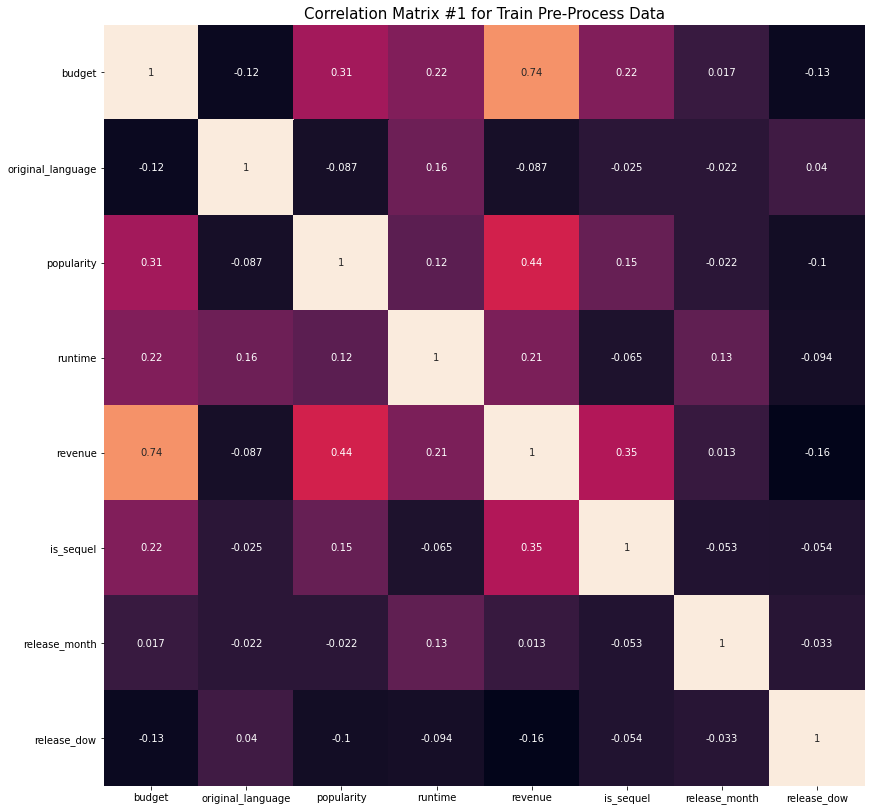

In [32]:
plt.figure(figsize=(24, 14))

col_list2= ['budget', 'original_language', 'popularity', 'runtime', 'revenue', 'is_sequel', 'release_month', 'release_dow']
corr_matrix_2 = train[col_list2].corr()


sns.heatmap(corr_matrix_2, square=True, annot=True, cbar=False)

plt.yticks(rotation=0) 
plt.xticks(rotation=0)
plt.title('Correlation Matrix #1 for Train Pre-Process Data', fontsize = 15)



Text(0.5, 1.0, 'Correlation Matrix #2 for Train Pre-Process Genre Data')

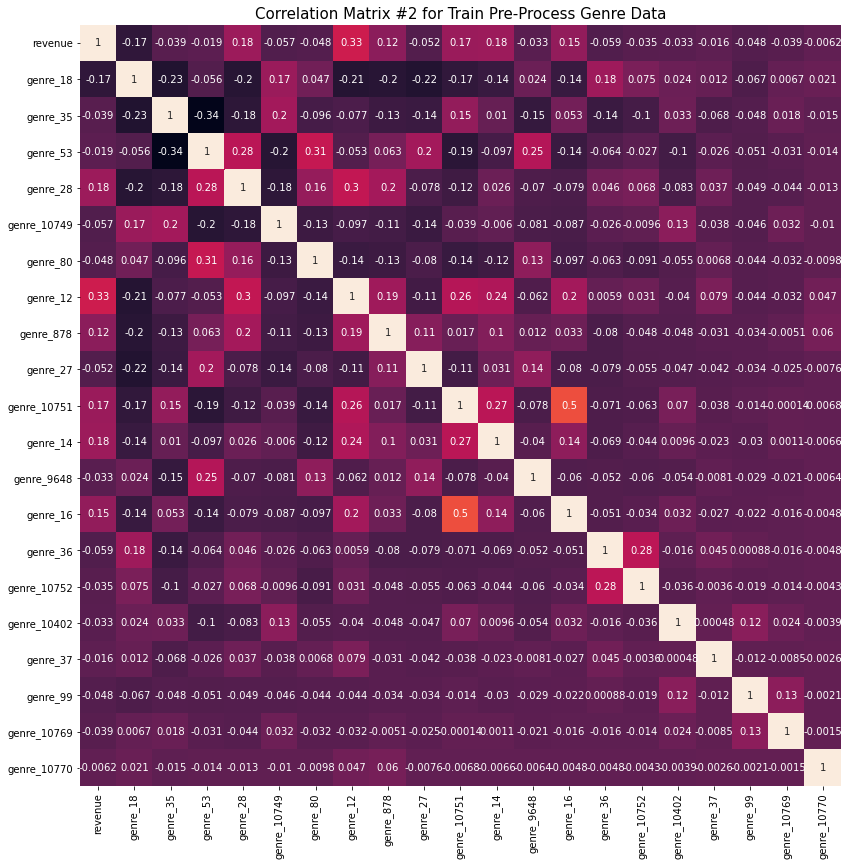

In [33]:
plt.figure(figsize=(24, 14))


col_list_genre = ['revenue','genre_18', 'genre_35', 'genre_53', 'genre_28', 'genre_10749', 'genre_80', 'genre_12', 'genre_878', 'genre_27', 'genre_10751', 'genre_14', 'genre_9648', 'genre_16', 'genre_36', 'genre_10752', 'genre_10402', 'genre_37', 'genre_99', 'genre_10769', 'genre_10770']
col_list_cast = ['revenue','cast_2231', 'cast_380', 'cast_18999', 'cast_192', 'cast_62', 'cast_14888', 'cast_2963', 'cast_976', 'cast_1461', 'cast_2178', 'cast_228', 'cast_10205', 'cast_887', 'cast_3896', 'cast_16483', 'cast_65827', 'cast_3895', 'cast_5293', 'cast_1241', 'cast_15831', 'cast_5723', 'cast_3087', 'cast_1892', 'cast_13240', 'cast_4038', 'cast_1248', 'cast_1532', 'cast_290', 'cast_388', 'cast_51329']
col_list_crew = ['revenue','crew_2294', 'crew_2952', 'crew_1213', 'crew_6410', 'crew_3965', 'crew_488', 'crew_1760', 'crew_5914', 'crew_59', 'crew_1034748', 'crew_4500', 'crew_1399071', 'crew_7232', 'crew_11874', 'crew_1729', 'crew_2874', 'crew_947', 'crew_6044', 'crew_561', 'crew_1307', 'crew_59839', 'crew_1338372', 'crew_1296', 'crew_3275', 'crew_1776', 'crew_7229', 'crew_1884', 'crew_108', 'crew_2031', 'crew_376']
col_list_keyword = ['revenue','keyword_179431', 'keyword_187056', 'keyword_9826', 'keyword_10183', 'keyword_818', 'keyword_14819', 'keyword_4565', 'keyword_179430', 'keyword_6075', 'keyword_9748', 'keyword_5565', 'keyword_9663', 'keyword_9937', 'keyword_6054', 'keyword_6149', 'keyword_572', 'keyword_9673', 'keyword_13130', 'keyword_12670', 'keyword_2483', 'keyword_378', 'keyword_293', 'keyword_242', 'keyword_494', 'keyword_209714', 'keyword_14964', 'keyword_4344', 'keyword_6270', 'keyword_9717', 'keyword_13027']
col_list_prodco = ['revenue','prodco_6194', 'prodco_33', 'prodco_4', 'prodco_306', 'prodco_5', 'prodco_12', 'prodco_8411', 'prodco_2', 'prodco_9195', 'prodco_441', 'prodco_7295', 'prodco_559', 'prodco_60', 'prodco_79', 'prodco_14', 'prodco_5358', 'prodco_444', 'prodco_27', 'prodco_508', 'prodco_1632', 'prodco_491', 'prodco_43', 'prodco_10163', 'prodco_711', 'prodco_333', 'prodco_1171', 'prodco_694', 'prodco_923', 'prodco_10210', 'prodco_7405']


corr_matrix_genre = train[col_list_genre].corr()
corr_matrix_cast = train[col_list_cast].corr()
corr_matrix_crew = train[col_list_crew].corr()
corr_matrix_keyword = train[col_list_keyword].corr()
corr_matrix_prodco = train[col_list_prodco].corr()


sns.heatmap(corr_matrix_genre, square=True, annot=True, cbar=False)
plt.title('Correlation Matrix #2 for Train Pre-Process Genre Data', fontsize = 15)


Text(0.5, 1.0, 'Correlation Matrix #2 for Train Pre-Process Genre Data')

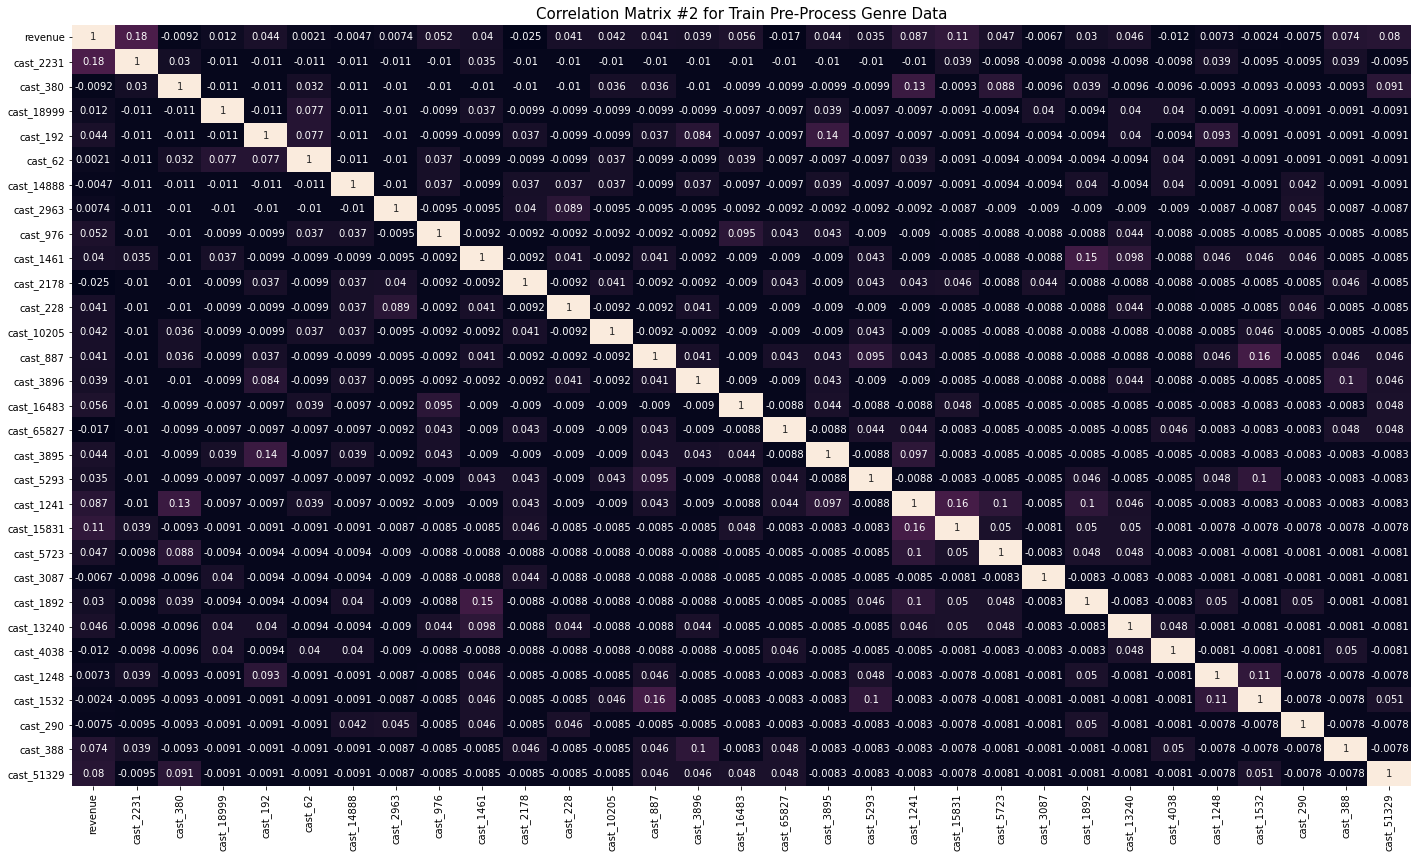

In [34]:

plt.figure(figsize=(24, 14))
sns.heatmap(corr_matrix_cast, annot=True, cbar=False)
plt.title('Correlation Matrix #2 for Train Pre-Process Genre Data', fontsize = 15)


Text(0.5, 1.0, 'Correlation Matrix #2 for Train Pre-Process Genre Data')

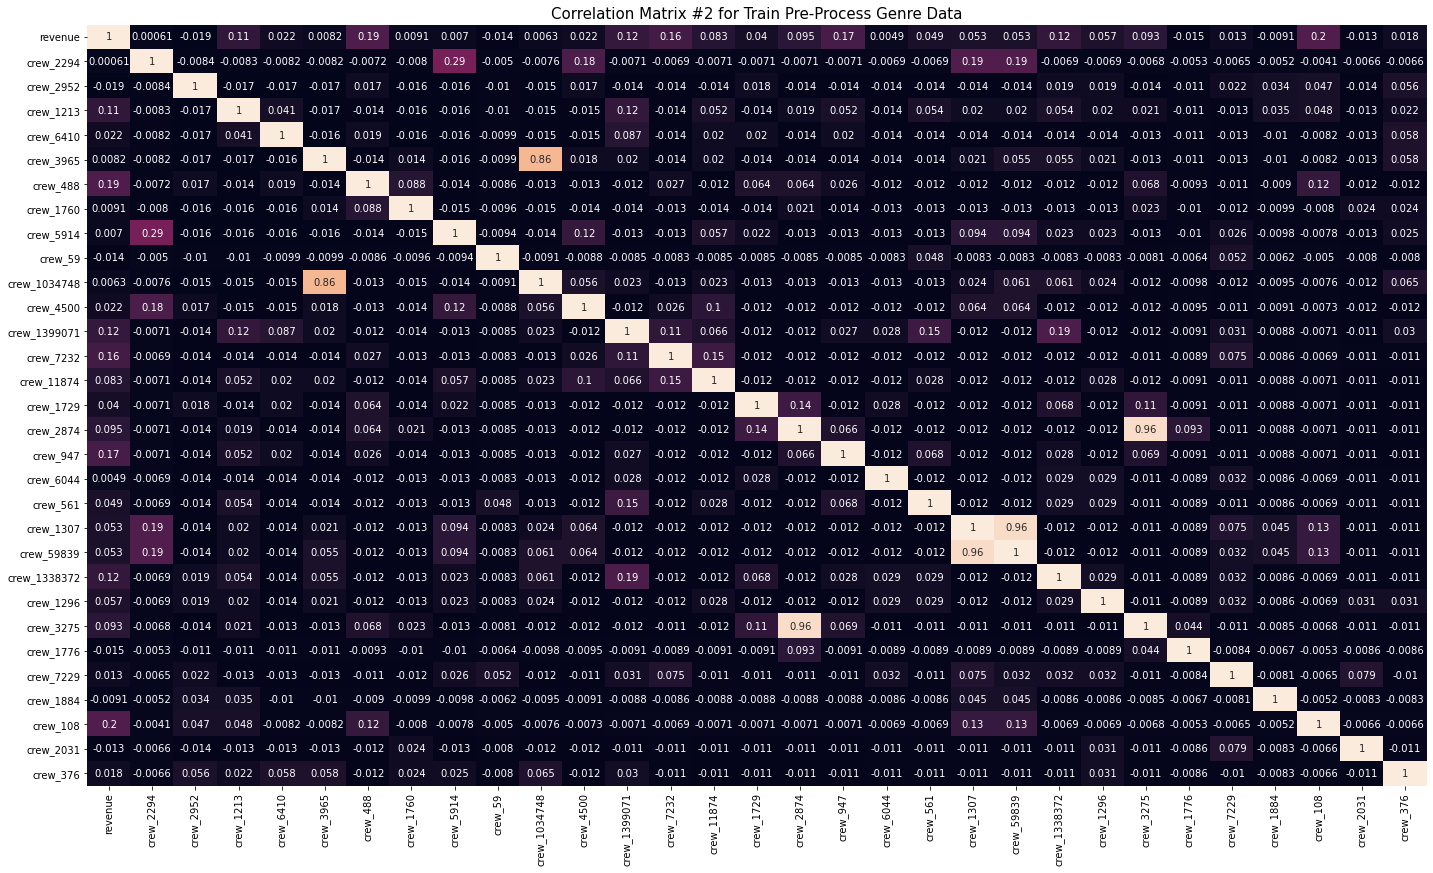

In [35]:

plt.figure(figsize=(24, 14))
sns.heatmap(corr_matrix_crew, annot=True, cbar=False)
plt.title('Correlation Matrix #2 for Train Pre-Process Genre Data', fontsize = 15)


Text(0.5, 1.0, 'Correlation Matrix #2 for Train Pre-Process Genre Data')

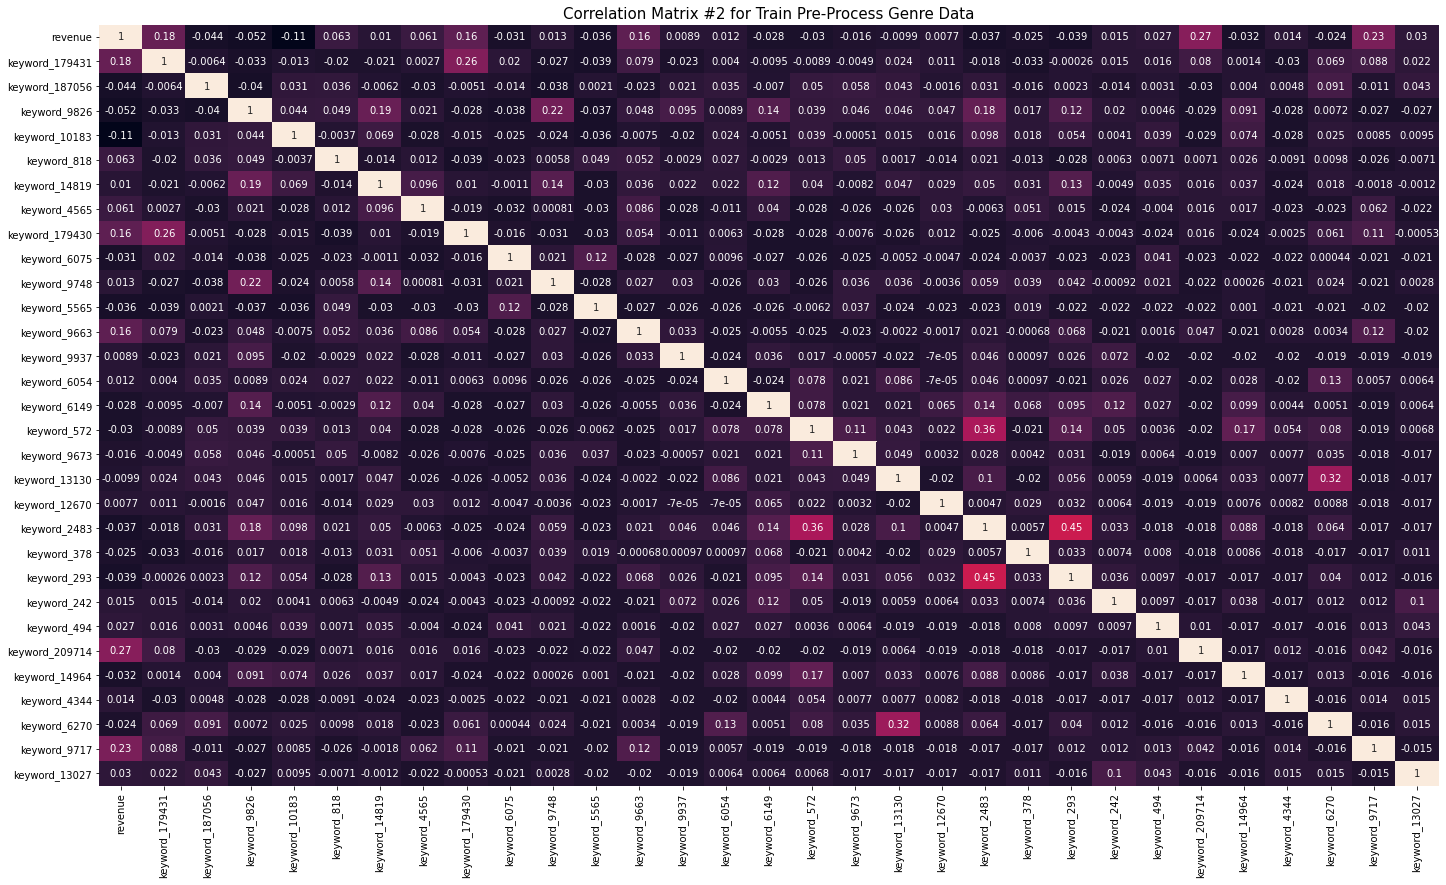

In [36]:

plt.figure(figsize=(24, 14))
sns.heatmap(corr_matrix_keyword, annot=True, cbar=False)
plt.title('Correlation Matrix #2 for Train Pre-Process Genre Data', fontsize = 15)


Text(0.5, 1.0, 'Correlation Matrix #2 for Train Pre-Process Genre Data')

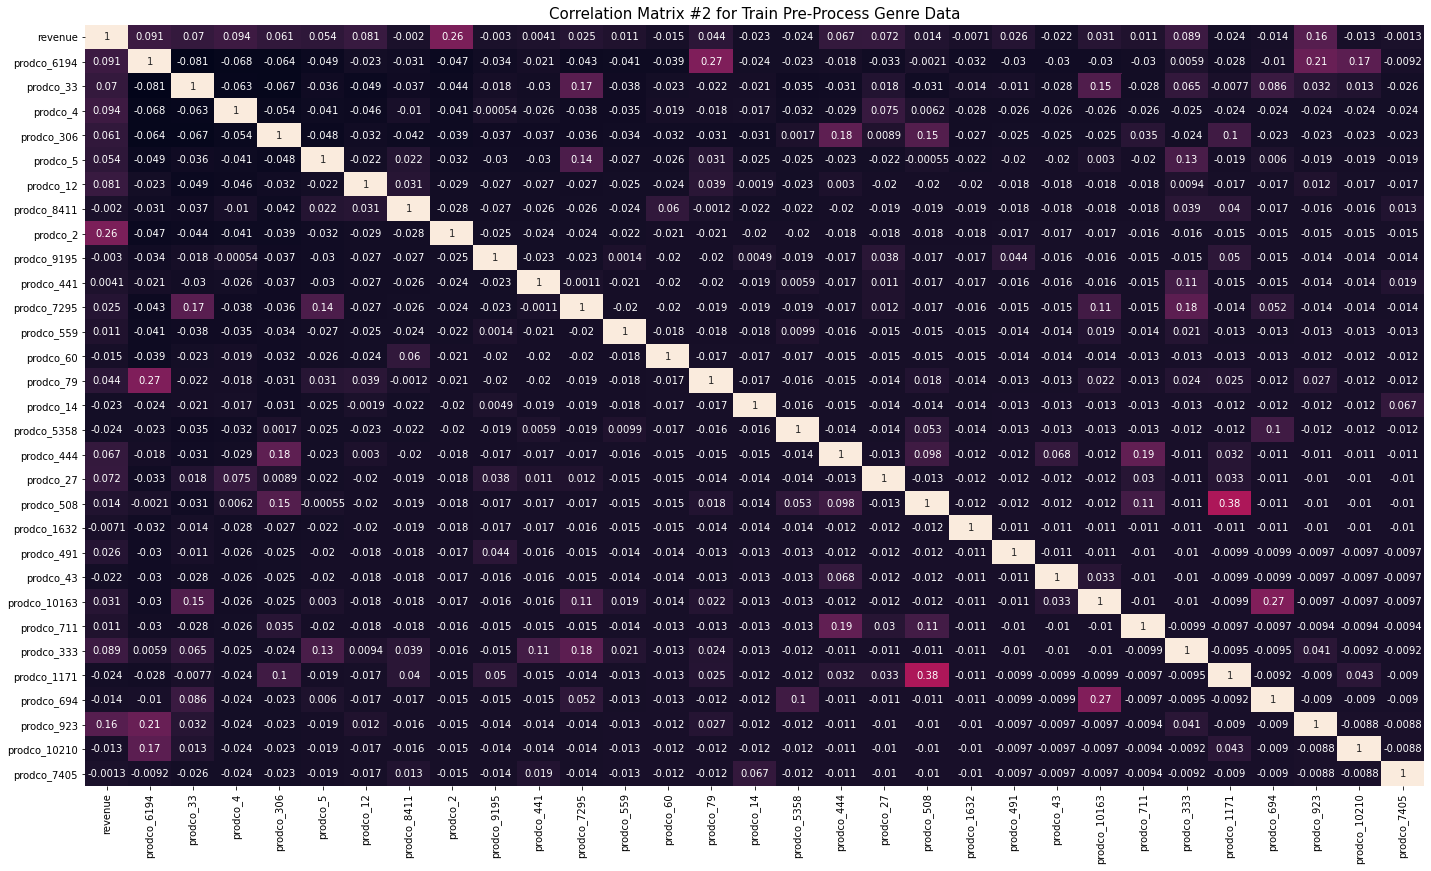

In [37]:

plt.figure(figsize=(24, 14))
sns.heatmap(corr_matrix_prodco, annot=True, cbar=False)
plt.title('Correlation Matrix #2 for Train Pre-Process Genre Data', fontsize = 15)


### Data log transformations

In [38]:
# Let's log transform the data to transform the raw data's high left skewness to a more normal distribution


train['revenue'] = np.log1p(train['revenue'])

train['budget'] = np.log1p(train['budget'])
test['budget'] = np.log1p(test['budget'])

train['popularity'] = np.log1p(train['budget'])
test['popularity'] = np.log1p(test['budget'])

In [39]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [40]:
train.isna().sum()

budget               0
original_language    0
popularity           0
runtime              1
revenue              0
                    ..
prodco_1171          0
prodco_694           0
prodco_923           0
prodco_10210         0
prodco_7405          0
Length: 148, dtype: int64

In [41]:
train.isna().sum().sum()

1

In [42]:
# dropped 1 reamining null value
train = train.dropna()

#80% train/20% test split
X_train, X_test, y_train, y_test = train_test_split(train.drop('revenue', axis = 1), train['revenue'], test_size=0.2, random_state=42)


## Linear Regression for Baseline Model

In [43]:
# Linear Regression using 'budget'

X_budg = train['budget'].values.reshape(-1,1)
y_rev = train['revenue']

reg = LinearRegression()

reg.fit(X_budg, y_rev)


# code for printing scores from: https://www.kaggle.com/sarthakbatra/box-office-revenue-random-forest-tutorial
print(f'Regression Score: {reg.score(X_budg, y_rev)}')
print(f'Regression Coefficient: {reg.coef_[0]}')
print(f'Regression Intercept: {reg.intercept_}')


Regression Score: 0.4288381412717468
Regression Coefficient: 0.8604260328951533
Regression Intercept: 2.6889648733388523


In [44]:
# Linear Regression using 'popularity'

X_pop = train['popularity'].values.reshape(-1,1)


reg.fit(X_pop, y_rev)


print(f'Regression Score: {reg.score(X_pop, y_rev)}')
print(f'Regression Coefficient: {reg.coef_[0]}')
print(f'Regression Intercept: {reg.intercept_}')


Regression Score: 0.33477317090370995
Regression Coefficient: 8.204130113921488
Regression Intercept: -6.579042840088796


## Random Forest Regression for Feature Selection

In [45]:
# Scores to evaulate the Random Forest
# Code directly from: https://www.kaggle.com/sarthakbatra/box-office-revenue-random-forest-tutorial

def rmse(y_pred, y_true):
    return np.sqrt(mean_squared_error(y_pred, y_true))

def print_rf_score(model):
    print(f'Train R2:   {model.score(X_train, y_train)}')
    print(f'Test R2:   {model.score(X_test, y_test)}')
    print(f'Train RMSE: {rmse(model.predict(X_train), y_train)}')
    print(f'Test RMSE: {rmse(model.predict(X_test), y_test)}')
    
    
# OOB score function from: https://www.kaggle.com/dway88/feature-eng-feature-importance-random-forest   
def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_test), y_test),
                m.score(X_train, y_train), m.score(X_test, y_test)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)


In [46]:
# Random Forrest Regression, with default hyperparameters

rf1 = RandomForestRegressor(n_jobs = -1, random_state = 42)
rf1.fit(X_train, y_train)
print_rf_score(rf1)


Train R2:   0.9198998600445327
Test R2:   0.42359725750443533
Train RMSE: 0.7381206812522095
Test RMSE: 2.066957640757346


In [47]:
# Random Forest Regression, with hyperparameter tuning, I just compared arbitrary hyperparamter values


## min_samples_leaf = 5
# min_samples_leaf = 10
# min_samples_leaf = 15


# n_estimators = 10
## n_estimators = 20
# n_estimators = 30
# n_estimators = 40
# n_estimators = 50


## max_features = 0.5
# max_features = 0.3

rf2 = RandomForestRegressor(n_estimators = 20, n_jobs = -1, max_features= 0.5, min_samples_leaf = 5, random_state = 42, oob_score=True)
rf2.fit(X_train, y_train)
print_rf_score(rf2)
print("OOB")
print_score(rf2)

Train R2:   0.6637996584456475
Test R2:   0.49602550392067124
Train RMSE: 1.5122020121703499
Test RMSE: 1.932737338619867
OOB
[1.5122020121703499, 1.932737338619867, 0.6637996584456475, 0.496025503920671, 0.4112066936226382]


/Users/jordanj/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


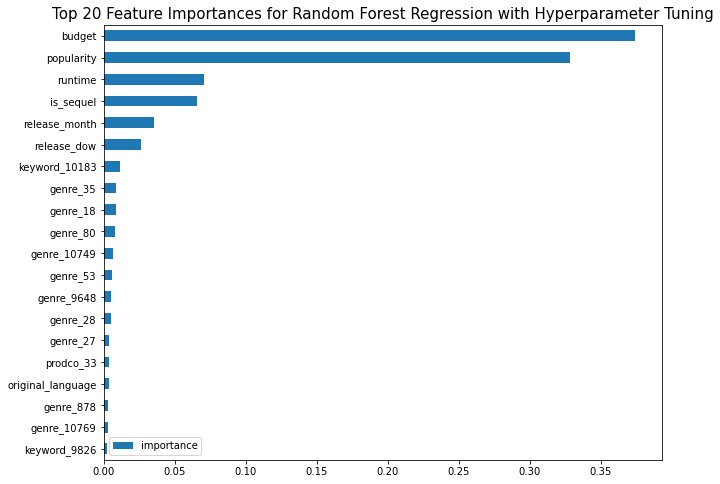

In [48]:
# feature_importances graph code from: https://www.kaggle.com/sarthakbatra/box-office-revenue-random-forest-tutorial

feature_importances = pd.DataFrame(rf2.feature_importances_, index = X_train.columns, columns=['importance'])
feature_importances = feature_importances.sort_values('importance', ascending=True)
feature_importances[-20:].plot(kind = 'barh', figsize = (10,8))
plt.title('Top 20 Feature Importances for Random Forest Regression with Hyperparameter Tuning', fontsize = 15)
plt.show()


### Feature codes to feature names

In [49]:
def id_to_name(text):
    if text[0] == 'k':
        text = int(text.strip('keyword_'))
        return train_keyword_dicts[text]['name']
    
    elif text[0] == 'g':
        text = int(text.strip('genre_'))
        return train_genre_dicts[text]['name']
    
    elif text[0] == 'c':
        if text[1] == 'a':
            text = int(text.strip('cast_'))
            return train_cast_dicts[text]['name']
        elif text[1] == 'r':
            text = int(text.strip('crew_'))
            return train_crew_dicts[text]['name']
    elif text[0] == 'p':
        text = int(text.strip('prodco_'))
        return train_prodco_dicts[text]['name']
        

In [50]:
# feat_ids = ['genre_10749','keyword_9937','cast_2963','genre_35','genre_80','genre_18','keyword_494','genre_53','genre_27','keyword_10183','keyword_187056','genre_28','crew_1034748']
feat_ids = ['keyword_10183', 'genre_18','genre_35','genre_10749','genre_80','genre_28','genre_9648','genre_53','genre_12','genre_27','prodco_33','genre_878','genre_10769']
for e in feat_ids:
    print(id_to_name(e))
    print()



#print_mapping_table(train_genre_dicts, [10749,35,80,18,53,27], 'Genres')
#print_mapping_table(train_keyword_dicts, [9937, 494, 10183,187056], 'Keywords')
#print_mapping_table(train_cast_dicts, [2963], 'Cast')
#print_mapping_table(train_crew_dicts, [1034748], 'Crew')
# print_mapping_table(train_prodco_dicts, train_top30_prodco_ids, 'Production Companies')



independent film

Drama

Comedy

Romance

Crime

Action

Mystery

Thriller

Adventure

Horror

Universal Pictures

Science Fiction

Foreign

